In [1]:
import os
import torch
import ot

parent_path='/home/baly/projects/linear_pgw'

os.chdir(parent_path)
from lib.opt import *
from lib.gromov_test import *   

import numpy as np 
import numba as nb
import warnings
import time
from ot.backend import get_backend, NumpyBackend
from ot.lp import emd


checked


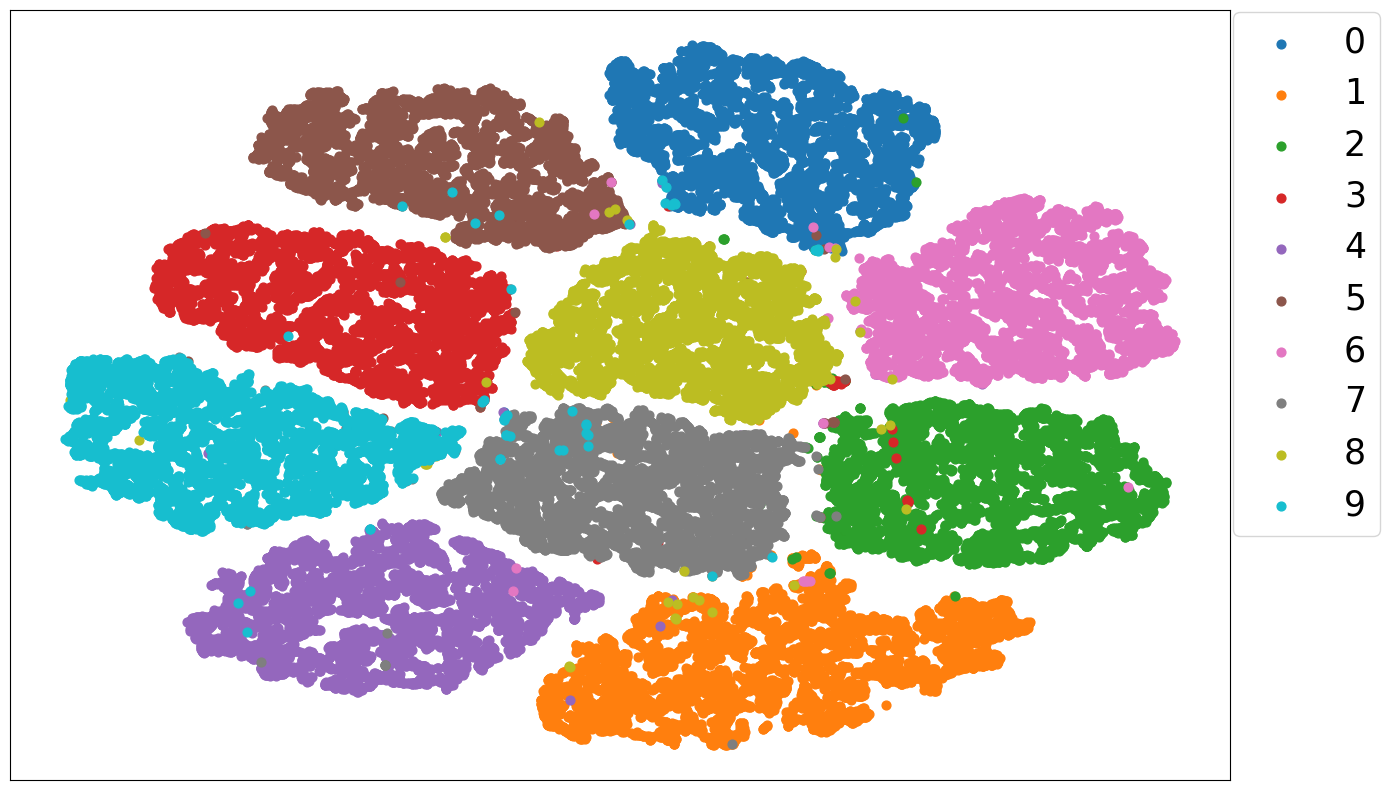

checked


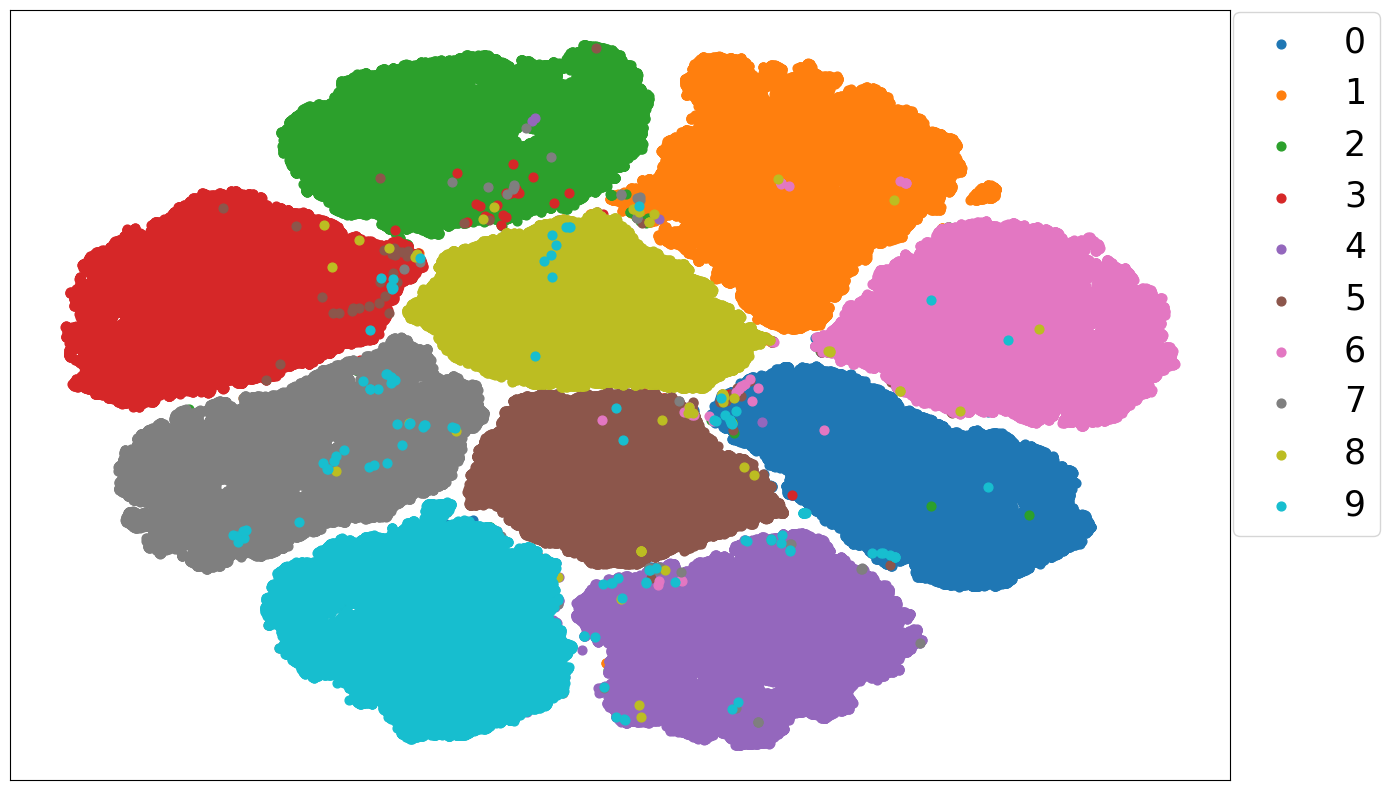

In [16]:
# load data 
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
def data_process(name='MNIST'):
    # open the data file 
    if name in ['MNIST','EMNIST']:
        data_file=torch.load('pu_learning/data/'+name+'.pt')
        (X,l)=data_file
        classes=None
    elif 'surf' in name or 'decaf' in name:        
        with open('pu_learning/data/'+name+'_fts.pkl', 'rb') as f:
            data_file = pickle.load(f)
     
        if 'surf' in name:
            X0=data_file['features']
            l=data_file['labels']
            pca = PCA(n_components=10, random_state=0)
            pca.fit(X0.T)
            X = pca.components_.T
            classes=data_file['classes']
        elif 'decaf' in name:

            X0=data_file['fc8']
            l=data_file['labels']
            classes=data_file['classes']
            pca = PCA(n_components=40, random_state=0)
            pca.fit(X0.T)
            X = pca.components_.T
    return (X,l),classes
        


from sklearn import manifold
# Select a subset of classes
EMNIST_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
          'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
          'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
          'U', 'V', 'W', 'X', 'Y', 'Z',
          'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 
          'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't' 
          'u','v', 'w', 'x', 'y', 'z']

for name in ['MNIST','EMNIST']:

    (x,l),classes=data_process(name=name)


    selected_classes = np.arange(0,10) #np.random.choice(range(max(l)), 15, replace=False) #np.arange(0,10) #np.random.randint(0,10,6) # #np.random.randint(0,20,10)  # Replace with your chosen class indices
    mask = np.isin(l, selected_classes)

    # Filter the data
    x_subset = x[mask]
    l_subset = l[mask]

    # Apply t-SNE to the subset
    tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
    x_2d_subset = tsne.fit_transform(x_subset)


    print('checked')
    # Iterate over each class in the selected_classes and plot them separately
    fig = plt.figure(figsize=(14, 8), tight_layout=True)  # Use tight_layout to reduce blank space
    for class_index in np.unique(l_subset):
        # Select data points that belong to the current class
        indices = l_subset == class_index
        plt.scatter(x_2d_subset[indices, 0], x_2d_subset[indices, 1], label=EMNIST_classes[class_index][0:2], s=40)
    plt.legend(bbox_to_anchor=(0.988, 1.02), loc="upper left", fontsize=25)

    # Remove x and y ticks
    plt.xticks([])
    plt.yticks([])

    # Save the plot as image and PDF
    plt.savefig('pu_learning/result/data_plot/'+name+'.jpg', dpi=200)
    plt.savefig('pu_learning/result/data_plot/'+name+'.pdf', dpi=200)
    plt.savefig('pu_learning/result/data_plot/'+name+'.png', dpi=200)


    # Show the plot
    plt.show()


In [15]:
classes

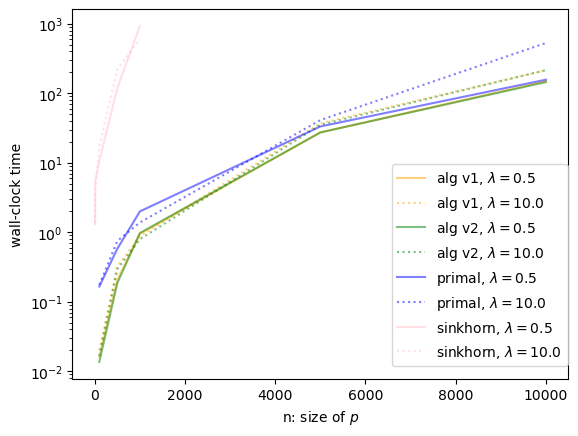

In [20]:
# wall clock time test 
import numpy as np
import torch
import matplotlib.pyplot as plt

import time
n_list=np.array([5,10,100,500,1000,5000,10000])
#n_list=[5e3,1e4]
n_list=np.array(n_list,dtype=np.int64)
repeat_num=5
Lambda_list=np.array([0.5,3.0,10.0])

time_list=torch.load('result/alg/time_list_save.pt')
time_v1=time_list['pgw_v1'] 
time_v2=time_list['pgw_v2']
time_prim=time_list['pgw_prim']
time_sinkhorn=time_list['pgw_sinkhorn']

time_v1_mean=np.mean(time_v1,2)
time_v2_mean=np.mean(time_v2,2)
time_prim_mean=np.mean(time_prim,2) 
time_sinkhorn_mean=np.mean(time_sinkhorn,2) 


fig, ax = plt.subplots()

# Plotting both error lists
for (method,color,time_mean) in zip(['alg v1','alg v2','primal','sinkhorn'],['orange','green','blue','pink'],[time_v1_mean,time_v2_mean,time_prim_mean,time_sinkhorn_mean]):
    for (Lambda_idx,Lambda,style) in zip(np.array([0,2]),Lambda_list[[0,2]],['-',':']):
        if method !='sinkhorn':
            ax.semilogy(n_list[2:], time_mean[2:,Lambda_idx][:],color=color,linestyle=style,alpha=0.5,label=method+f', $\lambda={Lambda}$')
        else:
            ax.semilogy(n_list[:-2], time_mean[:,Lambda_idx][:-2],color=color,alpha=0.5,linestyle=style,label=method+f', $\lambda={Lambda}$')


ax.set_xlabel('n: size of $p$')
ax.set_ylabel('wall-clock time')
#ax.set_title('Plot of Relative Error vs Size of $\mu$ for Different $\lambda$ Values')
ax.legend(bbox_to_anchor=(0.63, 0.6), loc="upper left")
plt.savefig('result/alg/time.png',dpi=200)
plt.savefig('result/alg/time.pdf',dpi=200)
plt.show()

In [17]:
l_subset

array([6, 3, 5, ..., 5, 1, 5])

In [18]:
mask.shape

(697932,)

In [19]:
%time Gamma2,_=opt_lp2(p,q,C,Lambda=0)

NameError: name 'opt_lp2' is not defined